In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Save path to data set in a variable
housing_data = "Nashville_housing_data_2013_2016.csv"

# Use Pandas to read data
housing_data_pd = df = pd.read_csv('../project1/Nashville_housing_data_2013_2016.csv')
housing_data_pd.head()



,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [5]:
housing_data_pd.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID', 'Land Use',
       'Property Address', 'Suite/ Condo   #', 'Property City', 'Sale Date',
       'Sale Price', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Owner Name', 'Address', 'City',
       'State', 'Acreage', 'Tax District', 'Neighborhood', 'image',
       'Land Value', 'Building Value', 'Total Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath'],
      dtype='object')

In [6]:


select =housing_data_pd[['Land Use', 'Sale Date', 'Building Value', 'Total Value', 'Bedrooms', 'Full Bath', 'Half Bath']]
select.head()

,Land Use,Sale Date,Building Value,Total Value,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,2013-01-24,NaN,NaN,NaN,NaN,NaN
1,SINGLE FAMILY,2013-01-11,134400.0,168300.0,2.0,1.0,0.0
2,SINGLE FAMILY,2013-01-18,157800.0,191800.0,3.0,2.0,1.0
3,SINGLE FAMILY,2013-01-18,243700.0,268700.0,4.0,2.0,0.0
4,SINGLE FAMILY,2013-01-23,138100.0,164800.0,2.0,1.0,0.0


In [7]:
housing_data_pd['Year'] = housing_data_pd['Sale Date'].str[:4]
housing_data_pd['Month'] = housing_data_pd['Sale Date'].str[5:7]
housing_data_pd['Date']= housing_data_pd['Sale Date'].str[8:10]


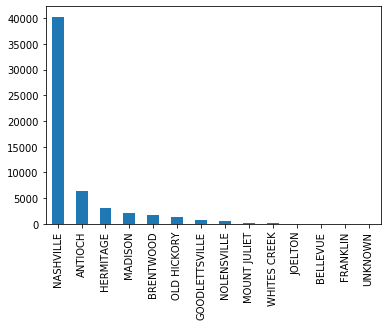

In [8]:
housing_data_pd['Property City'].value_counts().plot(kind='bar')

In [9]:
# housing_data_pd.unique()
group1 = select.groupby(['Sale Date', 'Building Value']).agg({'Total Value':'mean'})
group1.head()

# mean_housing_data = housing_data_pd.groupby(['Sale Date', 'Year Built']).mean()
# mean_housing_data.head()


Total Value
Sale Date  Building Value             
2013-01-02 48200.0             93200.0
           83400.0            245200.0
           114700.0           139100.0
           368200.0           459800.0
           1184700.0         1465500.0

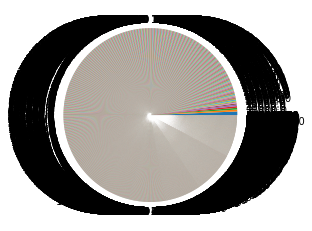

In [16]:
housing_data_pd['Total Value'].value_counts().plot(kind='pie')

In [15]:
df_format= group1.pivot_table(index='Sale Date', columns='Building Value', values ='Total Value')
# Preview that Reformatting worked
df_format.head()

Building Value,0.0,1400.0,1600.0,2100.0,2300.0,2700.0,2900.0,3300.0,3400.0,3500.0,...,2472500.0,2490600.0,2493900.0,2673700.0,2691500.0,3456900.0,3563100.0,3768000.0,5824300.0,12971800.0
Sale Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,15300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_format = group1.plot
df_format